In [1]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import pandas as pd
import numpy as np
import seaborn as sns
PATH=ChromeDriverManager().install()   

[WDM] - Downloading: 100%|██████████| 6.46M/6.46M [00:01<00:00, 4.01MB/s]


**CSV**

In [2]:
pokemons = pd.read_csv(r'C:\Users\jorge\BOOTCAMP\w4-ETL-Project\data\pokemon.csv')
pokemon = pokemons.copy()

## Exportamos el .cvs que contiene el listado de pokemon con todos sus stats (HP, ataque, defensa, etc.)

In [3]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1045 non-null   object
 1   Total       1045 non-null   int64 
 2   HP          1045 non-null   int64 
 3   Attack      1045 non-null   int64 
 4   Defence     1045 non-null   int64 
 5   Sp_attack   1045 non-null   int64 
 6   Sp_defence  1045 non-null   int64 
 7   Speed       1045 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 65.4+ KB


In [4]:
pokemon.head(10)

## Mostramos los 10 primeros pokémon de la lista 

,Name,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,Mega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65
5,Charmeleon,405,58,64,58,80,65,80
6,Charizard,534,78,84,78,109,85,100
7,Mega Charizard,634,78,130,111,130,85,100
8,Mega Charizard X,634,78,104,78,159,115,100
9,Squirtle,314,44,48,65,50,64,43


In [5]:
nan_cols = pokemon.isna().mean()*100
nan_cols

## COMPROBAMOS QUE NO HAY NULOS NI DUPLICADOS Y LOS ELIMINAMOS SI FUERA EL CASO

Name          0.0
Total         0.0
HP            0.0
Attack        0.0
Defence       0.0
Sp_attack     0.0
Sp_defence    0.0
Speed         0.0
dtype: float64

In [6]:
pokemon.duplicated().any()

# Comprobamos si existen duplicados.

True

In [7]:
pokemon.drop_duplicates(inplace=True)

# Eliminamos los duplicados.

In [8]:
pokemon.shape

(1040, 8)

In [9]:
pokemon.describe()

## SACAMOS Y ORDENAMOS LOS POKEMON EN FUNCIÓN DE SUS ESTADÍSTICAS

,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
count,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000
mean,439.065385,70.121154,80.531731,74.576923,72.908654,72.193269,68.733654
std,122.179909,26.713263,32.477622,31.263940,32.748911,28.079396,30.259182
min,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000
50%,457.000000,68.000000,78.000000,70.000000,65.000000,70.000000,65.000000
75%,515.000000,83.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [10]:
top_attack = pokemon.sort_values(by=['Attack'], ascending = False)
top_attack = top_attack[['Name', 'Attack']]
top_attack.head(10)

## Ordenamos la lista por orden de pokémon que tienen el stat de 'ataque' más elevado.

,Name,Attack
194,Mega Mewtwo,190
264,Mega Heracross,185
931,Kartana,181
464,Mega Rayquaza,180
467,Mega Deoxys,180
462,Mega Groudon,180
1028,Zacian,170
532,Mega Garchomp,170
755,Mega Kyurem,170
936,Mega Necrozma X,167


In [11]:
top_sa = pokemon.sort_values(by=['Sp_attack'], ascending = False)
top_sa = top_sa[['Name', 'Sp_attack']]
top_sa.head(10)

## Ahora vemos por orden qué pokemons tienen los stats de 'ataque especial' más alto.

,Name,Sp_attack
195,Mega Mewtwo X,194
460,Mega Kyogre,180
464,Mega Rayquaza,180
467,Mega Deoxys,180
84,Mega Alakazam,175
929,Xurkitree,173
125,Mega Gengar,170
845,Mega Hoopa,170
756,Mega Kyurem X,170
936,Mega Necrozma X,167


In [12]:
top_deffence = pokemon.sort_values(by=['Defence'], ascending = False)
top_deffence = top_deffence[['Name', 'Defence']]
top_deffence.head(10)

# Pokémons ordenados por 'defensa'.

,Name,Defence
1033,Mega Eternatus,250
256,Mega Steelix,230
262,Shuckle,230
368,Mega Aggron,230
941,Stakataka,211
255,Steelix,200
452,Regirock,200
834,Avalugg,184
121,Cloyster,180
106,Mega Slowbro,180


In [13]:
top_sp_deffence = pokemon.sort_values(by=['Sp_defence'], ascending = False)
top_sp_deffence = top_sp_deffence[['Name', 'Sp_defence']]
top_sp_deffence.head(10)

# Pokémons ordenados por 'defensa especial'.

,Name,Sp_defence
1033,Mega Eternatus,250
262,Shuckle,230
453,Regice,200
468,Mega Deoxys X,160
460,Mega Kyogre,160
784,Florges,154
303,Ho-oh,154
302,Lugia,154
818,Carbink,150
456,Mega Latias,150


In [14]:
top_speed = pokemon.sort_values(by=['Speed'], ascending = False)
top_speed = top_speed[['Name', 'Speed']]
top_speed.head(10)

# Pokémons ordenados por 'velocidad'.

,Name,Speed
1038,Regieleki,200
469,Mega Deoxys X,180
350,Ninjask,160
928,Pheromosa,151
1044,Mega Calyrex X,150
132,Electrode,150
182,Mega Aerodactyl,150
466,Deoxys,150
467,Mega Deoxys,150
84,Mega Alakazam,150


- AHORA, LOS MISMO PERO CON LOS MOVIMIENTOS

In [15]:
moves = pd.read_csv(r'C:\Users\jorge\BOOTCAMP\w4-ETL-Project\data\move-data.csv')
move = moves.copy()

## Vamos a sacar la lista de movimientos.

In [16]:
move.head()

,Index,Name,Type,Category,Contest,PP,Power,Accuracy,Generation
0,1,Pound,Normal,Physical,Tough,35,40,100,1
1,2,Karate Chop,Fighting,Physical,Tough,25,50,100,1
2,3,Double Slap,Normal,Physical,Cute,10,15,85,1
3,4,Comet Punch,Normal,Physical,Tough,15,18,85,1
4,5,Mega Punch,Normal,Physical,Tough,20,80,85,1


In [17]:
pokemon.duplicated().any()

## Comprobamos si hay duplicados. No hay.

False

In [18]:
nan_cols = pokemon.isna().mean()*100
nan_cols

## COMPROBAMOS QUE NO HAY NULOS NI DUPLICADOS Y LOS ELIMINAMOS SI FUERA EL CASO

Name          0.0
Total         0.0
HP            0.0
Attack        0.0
Defence       0.0
Sp_attack     0.0
Sp_defence    0.0
Speed         0.0
dtype: float64

In [19]:
top_pp = move.sort_values(by=['Power'], ascending = True)
top_pp = top_pp[['Name', 'Type', 'Power']]
top_pp.head(10)

## Ordenamos los movimientos por 'power' de menor a mayor.

,Name,Type,Power
131,Constrict,Normal,10
166,Triple Kick,Fighting,10
151,Crabhammer,Water,100
664,Ice Hammer,Ice,100
620,Hyperspace Fury,Dark,100
220,Sacred Fire,Fire,100
222,Dynamic Punch,Fighting,100
590,Diamond Storm,Rock,100
559,Flying Press,Fighting,100
558,Fusion Bolt,Electric,100


**1º SCRAPPING**

In [20]:
driver=webdriver.Chrome(PATH)  
driver.get('https://limitlessvgc.com/pokemon/?rank=pts&format=vgc22') 

## Lanzamos un listado de ranking de pokemon con mayor puntuación.

C:\Users\jorge\AppData\Local\Temp\ipykernel_9496\1716810280.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(PATH)


In [21]:
listacosas = []

for i in driver.find_elements(By.TAG_NAME, "tbody"):
    listacosas.extend(i.text.split("\n"))    
for i in range(2, len(listacosas), 3):
    listacosas[i] = listacosas[i].split()
    
listacosas1 = []

for i in listacosas:
    if type(i) == list:   
        listacosas1.extend(i)
    else:
        listacosas1.append(i)
        
nombrepokemon = [listacosas1[i] for i in range(1, len(listacosas1), 4)]
share = [listacosas1[i] for i in range(3, len(listacosas1), 4)]
PTS = [listacosas1[i] for i in range(2, len(listacosas1), 4)]

## Ordenamos por 'nombre del pokemon', 'puntos' y 'share'

In [22]:
driver.find_element("xpath", '/html/body/div[1]/div/div/main/div/div[3]/div[1]/nav/ul/li[3]/a').click()

In [23]:
listacosas = []
listacosas1 = []

for i in driver.find_elements(By.TAG_NAME, "tbody"):
    listacosas.extend(i.text.split("\n"))
    
for i in range(2, len(listacosas), 3):
    listacosas[i] = listacosas[i].split()

for i in listacosas:
    if type(i) == list:   
        listacosas1.extend(i)
    else:
        listacosas1.append(i)

for i in range(1, len(listacosas1), 4):
    nombrepokemon.append(listacosas1[i])
for i in range(2, len(listacosas1), 4):
    PTS.append(listacosas1[i])
for i in range(3, len(listacosas1), 4):
    share.append(listacosas1[i])

    # Pedimos que nos encaje la información en sus tres columnas.

In [24]:
driver.close()

In [25]:
dic = {"Name": nombrepokemon, "PTS": PTS, "Share": share}
pokemon_pick = pd.DataFrame(dic)
pokemon_pick["Posicion"] = list(range(1, len(pokemon_pick) + 1))
pokemon_pick.reindex(columns=["Posicion", "Name", "PTS", "Share"])
pokemon_pick.head(10)

## Creamos un diccionario para almacenarlo todo y ejecutamos los 10 primeros.


,Name,PTS,Share,Posicion
0,Incineroar,362,84.58%,1
1,Zacian,304,71.03%,2
2,Groudon,166,38.79%,3
3,Kyogre,139,32.48%,4
4,Grimmsnarl,137,32.01%,5
5,Gastrodon,112,26.17%,6
6,Gigantamax Charizard,105,24.53%,7
7,Regieleki,103,24.07%,8
8,Gigantamax Rillaboom,92,21.50%,9
9,Gigantamax Venusaur,83,19.39%,10


**2º SCRAPPING**

In [26]:
driver = webdriver.Chrome(PATH)
driver.get('https://uniteapi.dev/rankings')

## Ejecutamos el API de ranking de top pokemons.

C:\Users\jorge\AppData\Local\Temp\ipykernel_9496\607719404.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


In [27]:
body = [i.text for i in driver.find_elements(By.TAG_NAME, 'td')]

win_rate = [body[i] for i in range(4, len(body), 5)]
points = [body[i] for i in range(3, len(body), 5)]
name = [body[i] for i in range(1, len(body), 5)]

## Pedimos que lo separe por 'nombre del pokemon, 'puntos' y 'win rate'

In [28]:
driver.close()

In [29]:
pokedict = {'Name': name, 
         'Points': points,
         'Win_rate': win_rate}

pokemones = pd.DataFrame(pokedict)
pokemones.head(10)

## Creamos el diccionario para lanzar los 10 primeros.

,Name,Points,Win_rate
0,Absol,6634,92 %
1,Aegislash,1896,84 %
2,Alolan Ninetales,8420,64 %
3,Azumarill,1872,99 %
4,Blastoise,3991,56 %
5,Blissey,3109,48 %
6,Buzzwole,801,85 %
7,Charizard,5432,74 %
8,Cinderace,6906,91 %
9,Clefable,157,97 %


In [30]:
import pandas as pd

In [31]:
tipo = pd.read_csv(r"C:\Users\jorge\BOOTCAMP\w4-ETL-Project\data\pokemon2.csv")
tipo.drop(columns="Type2", inplace = True)
tipo["Name"] = tipo["Name"].str.capitalize()
tipo

## Sacamos la información del listado de todos los pokemons con su 'tipo'

,Name,Type1
0,Bulbasaur,Grass
1,Ivysaur,Grass
2,Venusaur,Grass
3,Charmander,Fire
4,Charmeleon,Fire
...,...,...
804,Stakataka,Rock
805,Blacephalon,Fire
806,Zeraora,Electric
807,Meltan,Steel


In [32]:
pick_rate_tipo = tipo.merge(pokemon_pick, how='inner', on='Name')

In [33]:
pick_rate_tipo['Share'] = [i[:-1] for i in pick_rate_tipo["Share"]] #no coge los porcentajes el formato float... susmuertos.
pick_rate_tipo['Share'] = pick_rate_tipo['Share'].astype('float64')
pick_rate_tipo['PTS'] = pick_rate_tipo['PTS'].astype('float64')

In [34]:
pick_rate_tipo.info()         # ya estan los formatos de datos para ordenarlos.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      24 non-null     object 
 1   Type1     24 non-null     object 
 2   PTS       24 non-null     float64
 3   Share     24 non-null     float64
 4   Posicion  24 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ KB


In [35]:
pick_rate_tipo.sort_values(by=['Share'], ascending = False) #ordenamos por share

,Name,Type1,PTS,Share,Posicion
19,Incineroar,Fire,362.0,84.58,1
8,Groudon,Ground,166.0,38.79,3
7,Kyogre,Water,139.0,32.48,4
9,Gastrodon,Water,112.0,26.17,6
4,Porygon2,Normal,79.0,18.46,11
18,Yveltal,Dark,68.0,15.89,13
15,Amoonguss,Grass,68.0,15.89,12
14,Whimsicott,Grass,58.0,13.55,15
20,Mimikyu,Ghost,36.0,8.41,19
3,Zapdos,Electric,32.0,7.48,20


NO VOY A HACER EL MERGE DE LAS DOS DATAFRAMES PORQUE NO COINCIDEN Y QUEDA ABSURDA XD

In [36]:
win_rate_tipo = tipo.merge(pokemones, how='inner', on='Name')
win_rate_tipo.columns

Index(['Name', 'Type1', 'Points', 'Win_rate'], dtype='object')

In [37]:
win_rate_tipo["Win_rate"] = [i[:-1] for i in win_rate_tipo["Win_rate"]] #quitamos porcentaje

In [38]:
win_rate_tipo.sort_values(by=['Win_rate'], ascending = False) #ordenamos por win_rate

,Name,Type1,Points,Win_rate
17,Tyranitar,Rock,1443,99
29,Trevenant,Ghost,2128,99
13,Azumarill,Water,1872,99
9,Gengar,Ghost,6884,98
12,Mew,Psychic,1480,98
25,Delphox,Fire,1168,97
4,Clefable,Fairy,157,97
11,Dragonite,Dragon,7374,94
0,Venusaur,Grass,6027,94
19,Absol,Dark,6634,92


In [56]:
pokemon_tipo = tipo.merge(pokemon, how='left', on='Name')

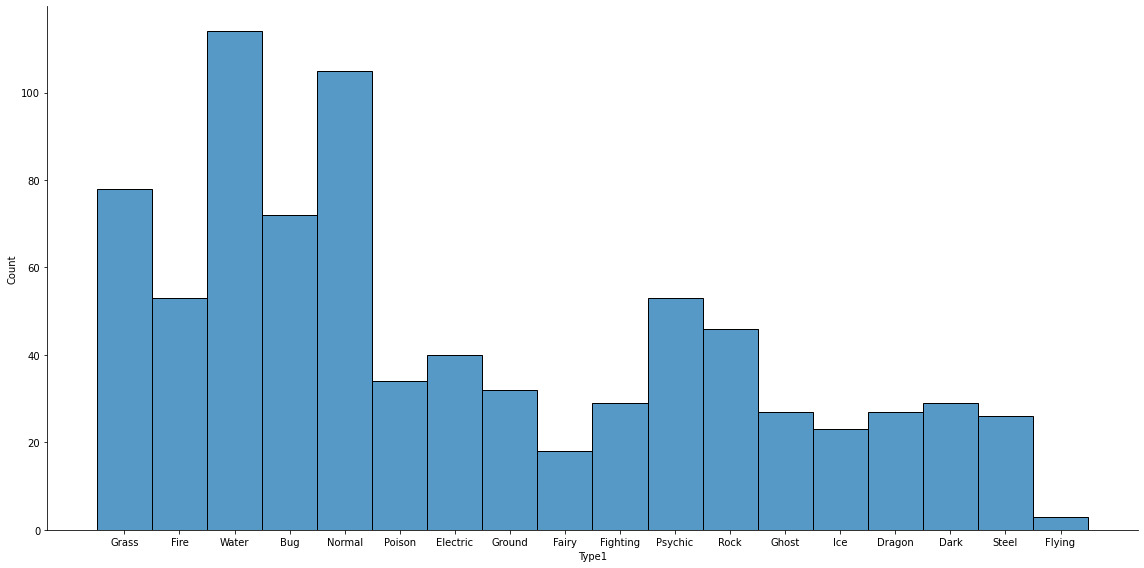

In [88]:
sns.displot(pokemon_tipo, x="Type1", stat='count', height= 8, aspect=2)


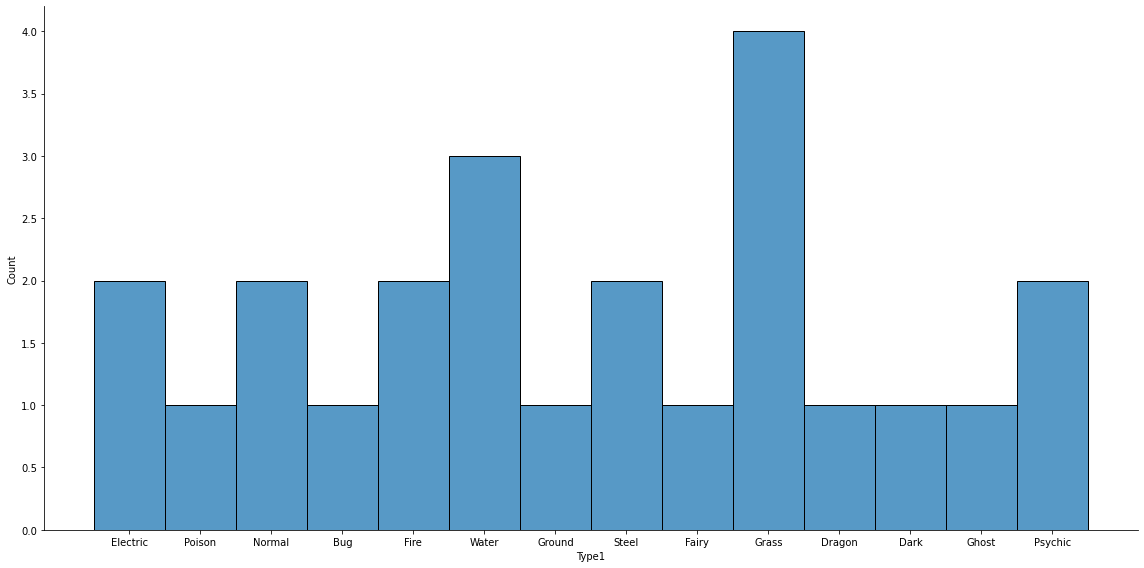

In [90]:
sns.displot(pick_rate_tipo, x="Type1", stat='count', height= 8, aspect=2)

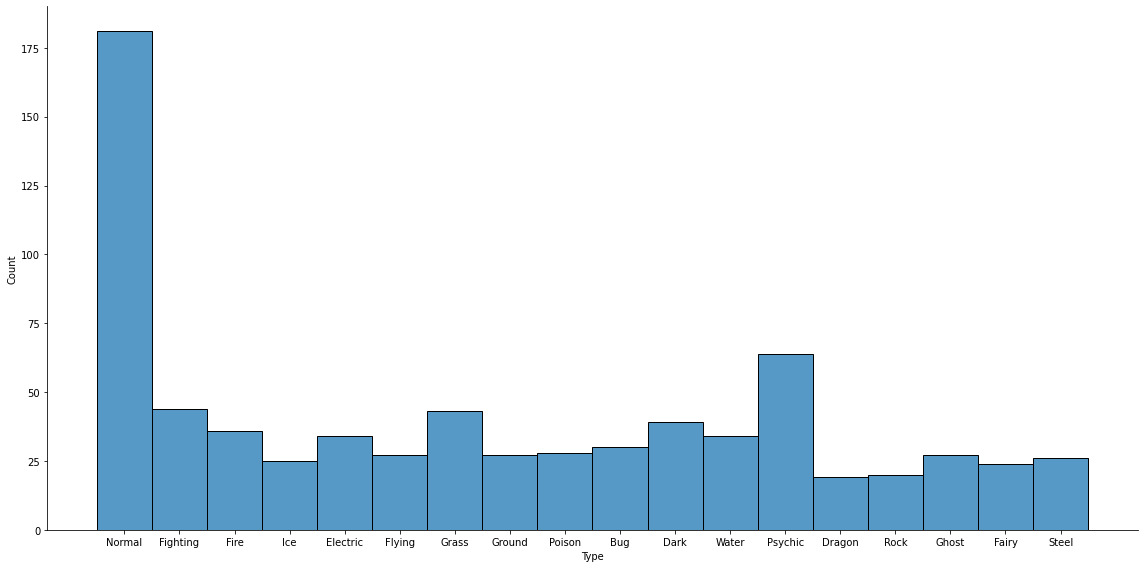

In [91]:
sns.displot(move, x="Type", stat='count', height= 8, aspect=2)

In [96]:
pick_rate_tipo["Type1"].value_counts()

Grass       4
Water       3
Electric    2
Normal      2
Fire        2
Steel       2
Psychic     2
Poison      1
Bug         1
Ground      1
Fairy       1
Dragon      1
Dark        1
Ghost       1
Name: Type1, dtype: int64

In [ ]:
#### CONCLUSIONES:


###      Llegados a este punto, hemos podido comprobar que:

### 1. A simple vista, las bases de datos están bastante limpias.

### 2. Los Pokemon estrella son Incineroar, Groudon y Kyogre.

### 3. El tipo de Pokémon que más suele ganar es el de tipo 'agua', 
### seguido de tipo 'normal' y tipo 'planta'. El tipo que menos suele ganar
### es 'volador', 'hada' y 'hielo'.

### 4. Los ataques más utilizados son de tipo 'planta', 'agua' y 'eléctrico'.

###       Vista final: 
### Sabiendo los Pokemon más fuertes y los tipos más débiles,
### ya podemos tener más probabilidades de ganar un combate Pokemon.